# Dimensionality Reduction using PCA

In [101]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

## MNIST dataset

In [102]:
dataset = fetch_openml('mnist_784', version=1, as_frame=True)

x_train, y_train = dataset.data[:60000], dataset.target[:60000]
x_test, y_test = dataset.data[60000:], dataset.target[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


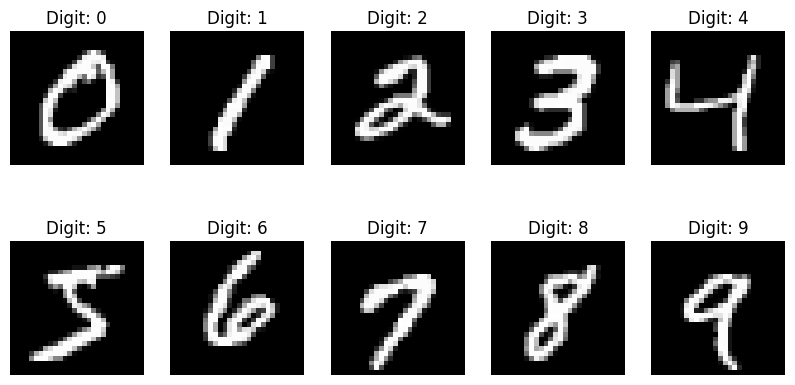

In [103]:
# Get one image for each item
digit_images = {}
for label in y_train.unique():
  digit_images[label] = x_train[y_train == label].iloc[0].values.reshape(28, 28)

#Sort the images
digit_images = {k: v for k, v in sorted(digit_images.items(), key=lambda item: item[0])}

# Plot 10 digits in a 2x5 plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

for (label, image) in digit_images.items():
  row = int(label) // 5
  col = int(label) % 5
  axes[row, col].imshow(image, cmap='gray')
  axes[row, col].set_title(f"Digit: {label}")
  axes[row, col].axis('off')

plt.show()

In [104]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca.fit(x_train)

# Get the explained variance ratio
evr = explained_variance_ratio = pca.explained_variance_ratio_
len(pca.components_)

2

In [105]:
print("First principal component:")
print(pca.components_.T[:,0])
print("Second principal component:")
print(pca.components_.T[:,1])

First principal component:
[ 1.42889431e-17  6.15558813e-18  4.44912006e-20 -1.83648004e-19
 -4.20697837e-21  2.18190292e-20  4.49007584e-21  2.10279325e-21
 -1.01915702e-21  5.43288738e-22 -3.52002292e-23 -0.00000000e+00
 -1.13021907e-06 -4.44988125e-06 -2.19789864e-06 -9.15791099e-08
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.46330537e-07  8.70394396e-07  8.07853108e-06  2.07904301e-05
  2.74491267e-05  4.43310354e-05  7.14304552e-05  9.03581107e-05
  8.92536813e-05  7.96182509e-05  8.37890117e-05  6.11988893e-05
  3.32457793e-05  3.18849954e-05  1.84438898e-05 -1.32998290e-05
 -1.08535044e-05  1.55997864e-06  1.06850733e-06  5.04512152e-07
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.96616378e-06  1.09263186e-0

In [106]:
print(f"Explained variance ratio: {evr}")

Explained variance ratio: [0.09704664 0.07095924]


In [107]:
# Transform the data using PCA
x_train_pca = pca.transform(x_train)
print(x_train_pca.shape)

(60000, 2)


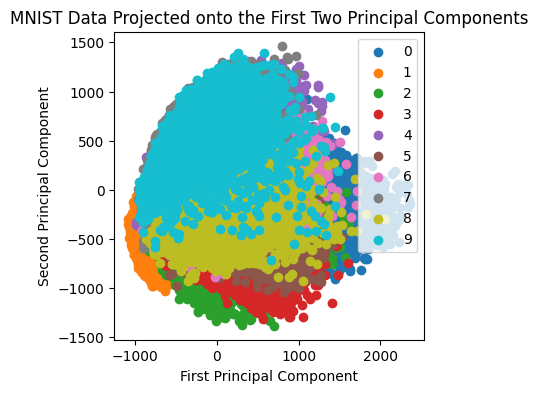

In [108]:
# Plot the transformed data
plt.figure(figsize=(4,4))
for label in map(str, range(10)):
    plt.scatter(x_train_pca[y_train == label, 0], x_train_pca[y_train == label, 1],
                label=label)
plt.legend()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('MNIST Data Projected onto the First Two Principal Components')

plt.show()

In [109]:
from sklearn.decomposition import IncrementalPCA

# Apply IncrementalPCA with 154 components
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(x_train, n_batches):
    inc_pca.partial_fit(X_batch)

x_train_inc_pca = inc_pca.transform(x_train)
print(x_train_inc_pca.shape)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(60000, 154)


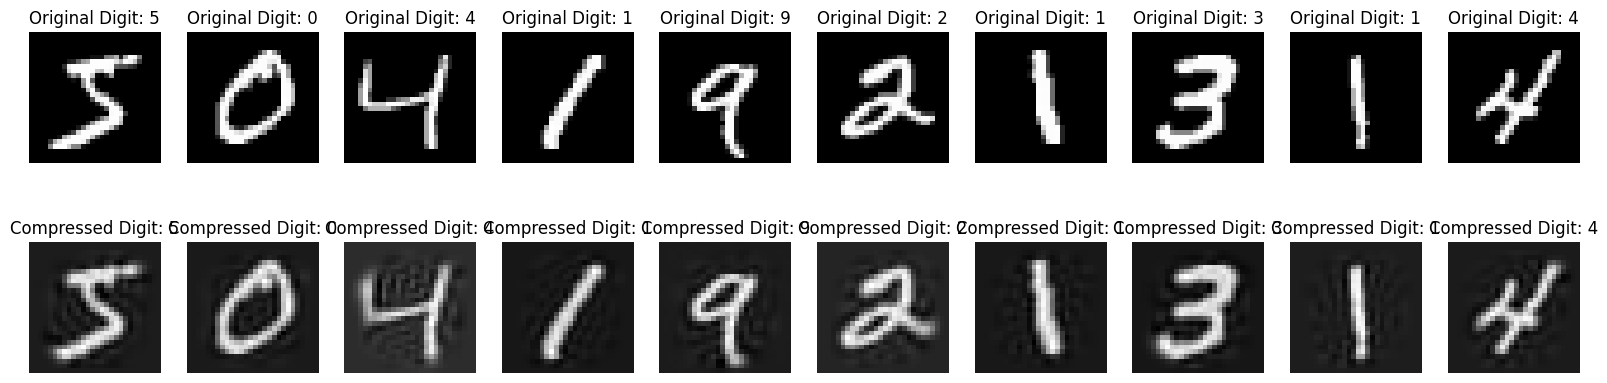

In [110]:
# Reconstruct the digits using the reduced data
x_train_reconstructed = inc_pca.inverse_transform(x_train_inc_pca)

# Plot 10 original and compressed digits in a 2x10 plot
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(20, 5))

for i in range(10):
    axes[0, i].imshow(x_train.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f"Original Digit: {y_train.iloc[i]}")
    axes[0, i].axis('off')

    axes[1, i].imshow(x_train_reconstructed[i].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f"Compressed Digit: {y_train.iloc[i]}")
    axes[1, i].axis('off')

plt.show()


# Kernel PCA

In [111]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
from mpl_toolkits.mplot3d import Axes3D

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=86)

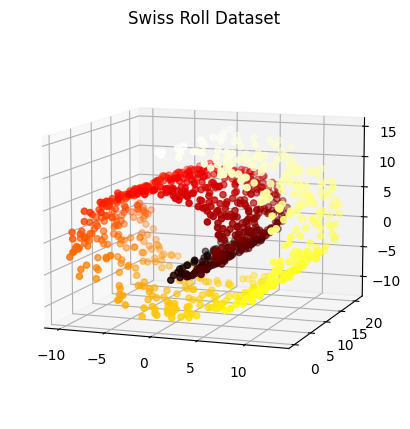

In [112]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
plt.title("Swiss Roll Dataset")
plt.show()

## Linear Kernel

In [113]:
lin_kpca = KernelPCA(n_components=2, kernel="linear")
X_reduced_lin = lin_kpca.fit_transform(X)

## RBF Kernel

In [114]:
rbf_kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced_rbf = rbf_kpca.fit_transform(X)

## Sigmoid Kernel

In [115]:
sig_kpca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1)
X_reduced_sig = sig_kpca.fit_transform(X)

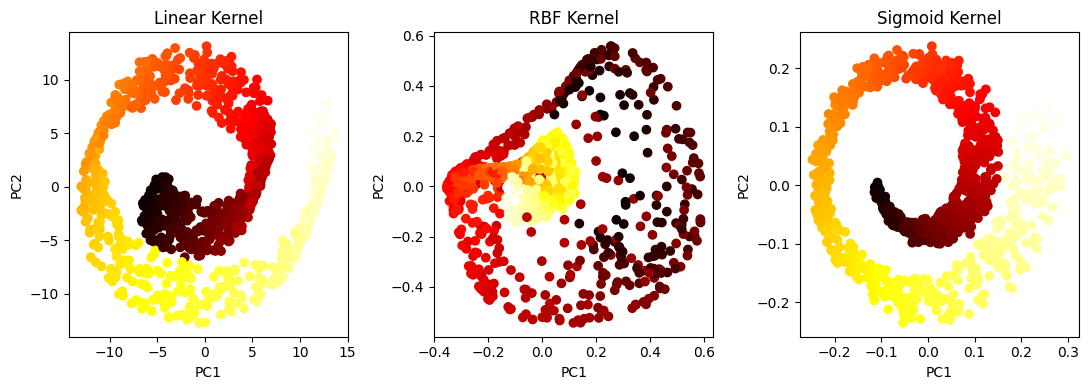

In [116]:
# Plot the kPCA results. Explain and compare the results
plt.figure(figsize=(11, 4))

plt.subplot(131)
plt.scatter(X_reduced_lin[:, 0], X_reduced_lin[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Linear Kernel")

plt.subplot(132)
plt.scatter(X_reduced_rbf[:, 0], X_reduced_rbf[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("RBF Kernel")

plt.subplot(133)
plt.scatter(X_reduced_sig[:, 0], X_reduced_sig[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Sigmoid Kernel")

plt.tight_layout()
plt.show()


In [117]:
t[0:10]

array([ 6.62191453,  6.6641955 ,  6.15096582, 11.82425868,  6.85583575,
       10.97121404, 10.26563615,  8.68632041, 12.78022394,  9.29992508])

In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline with KernelPCA and Logistic Regression
pipeline = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('logistic', LogisticRegression())
])

param_grid = {
    'kpca__kernel': ['rbf', 'sigmoid'],
    'kpca__gamma': np.linspace(0.01, 1, 10)
}

# Create a grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Convert continuos labels
n_classes = 10
y = np.digitize(t, np.linspace(t.min(), t.max(), n_classes))

# Fit the GridSearchCV object to the training data
grid_search.fit(X, y)
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'kpca__gamma': 0.01, 'kpca__kernel': 'sigmoid'}


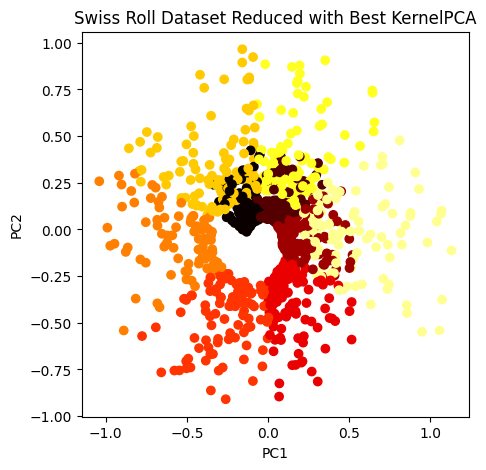

In [119]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

X_reduced = best_estimator.named_steps['kpca'].transform(X)

# Plot the results
plt.figure(figsize=(5, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.hot)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Swiss Roll Dataset Reduced with Best KernelPCA")

plt.show()
